Pertama, hubungkan Colab ke Google Drive karena semua file dataset yang akan digunakan disimpan di Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Buat variabel dengan name **base_path** yang berisi jalur ke folder dataset yang akan digunakan

In [ ]:
base_path = '/content/drive/MyDrive/JST/UAS/Fruit360'

Untuk mengubah data menjadi bentuk kumpulan array, kita membutuhkan ImageDataGenerator() dari library Keras.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

Selanjutnya membuat generator kita sendiri dengan kode dibawah.

In [ ]:
generator = ImageDataGenerator(
    horizontal_flip = True,
    vertical_flip = True,
    height_shift_range = .2,
    validation_split = 0.2
)

Terdapat argumen seperti **horizontal_flip**, **vertical_flip**, dan **height_shift_range** adalah parameter dari ImageDataGenerator() untuk memvariasikan gambar. Contohnya seperti horizontal_flip digunakan untuk membalik gambar secara horizontal.

Argumen **validation_split** digunakan untuk melakukan validasi dari pelatihan, **validation_split** ini membagi data dari dataset sesuai yang diinginkan, pada kode diatas terdapat value **0.2** yang artinya dataset akan dibagi menjadi 80% untuk pelatihan, dan 20% untuk validasi.

# Fungsi training dan validasi

Pilih kelas yang akan digunakan, masukkan dalam variabel **classess** dengan penamaan snake case. Kelas yang tersedia:
Apple (golden), Apple (Red Yellow 1, red, golden2), Kiwi, Pear, Grapefruit, Lemon, Orange, Strawberry, Apple (golden3, Braeburn, Granny Smith, red2), Apple (red3), Plum, Peach, Peach flat, Apricot, Nectarine, Pomegranate, Avocado, Papaya, Grape, Cherrie, Carambula, Cactus fruit, Granadilla, Kaki, Kumsquats, Passion fruit, Avocado ripe, Quince, Clementine, Cocos, Mango, Lime, Lychee, Apple Red Delicious, Pear Monster, Grape White, Banana, Grapefruit Pink, Mandarine, Pineapple, Tangelo, Huckleberry, Raspberry, Dates, Maracuja, Plum 2, Salak, Tamarillo, Guava, Grape White 2, Lemon Meyer, Banana Red, Pepino, Pitahaya Red, Pear Abate, Pear Williams, Lemon rotated, Pomegranate rotated, Cherry Rainier, Cherry 2, Strawberry Wedge, Cantaloupe (2 varieties), Melon Piel de Sapo, Pineapple Mini, Physalis, Physalis with Husk, Rumbutan, Mulberry, Redcurrant, Cherry Red, Hazelnut, Walnut, Tomato, Cherry Wax (Yellow, Red, Black), Apple Red Yellow 2, Grape Blue, Grape White 2, Grape White 3, Peach 2, Plum 3, Tomato Maroon, Tomato 1-4, Nut Pecan, Pear Kaiser, Tomato Yellow, Banana Lady Finger, Chesnut, Mangostan, Pomelo Sweetie, Apple Crimson Snow, Apple Pink Lady, Blueberry, Kohlrabi, Mango Red, Pear Red, Pepper (Red, Yellow, Green), Beetroot Red, Corn, Ginger Root, Nectarine Flat, Nut Forest, Onion Red, Onion Red Peeled, Onion White, Potato Red, Potato Red Washed, Potato Sweet, Potato White, Cauliflower, Eggplant, Pear Forelle, Pepper Orange, Tomato Heart, Corn Husk, Cucumber Ripe, Fig, Pear 2, Pear Stone, Tomato not Ripened, Watermelon.




In [ ]:
labels = ['jagung', 'jambu_biji', 'leci']

In [ ]:
train_image = generator.flow_from_directory(
    base_path,
    target_size=(224, 224),
    classes=labels,
    class_mode='categorical',
    subset='training',
    shuffle=False,
)

val_image = generator.flow_from_directory(
    base_path,
    target_size=(224, 224),
    classes=labels,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 1144 images belonging to 3 classes.
Found 286 images belonging to 3 classes.


Disini kita membagi dataset menjadi 2 yaitu, **train_image** untuk pelatihan dan **val_image** untuk validasi. Dengan menambahkan **subset='validation'** akan menandakan bahwa itu adalah data untuk validasi, yaitu 20% dari dataset seperti yang sudah ditentukan pada generator.

**target_size=(224, 224)** akan membuat gambar menjadi ukuran 224x224 piksel untuk menyamakan semua gambar.

**class_mode** dibuat ‘**categorical**’ karena kita akan menentukan 3 class yaitu, jagung, jambu_biji dan leci.

**shuffle** akan mengambil data secara acak jika isinya True.

# Training Data

Training data dilakukan untuk mengenalkan dataset kepada model

## Data yang digunakan

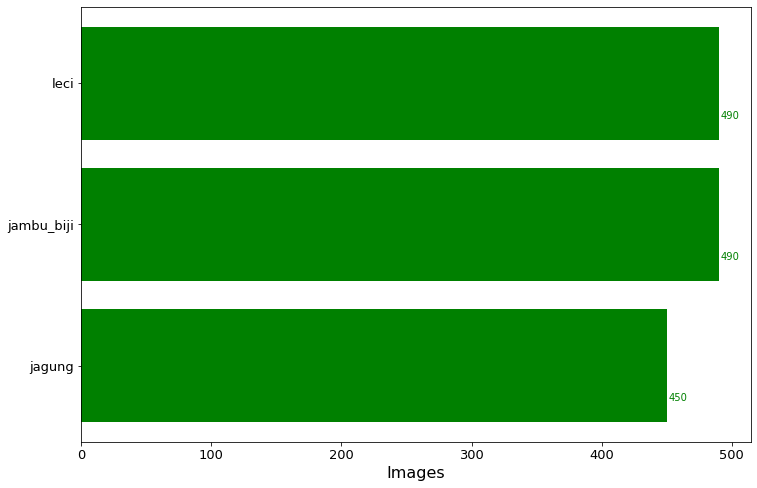

In [ ]:
import os
main = base_path

data=dict()

for i in os.listdir(main):
    sub_dir=os.path.join(main,i)
    count=len(os.listdir(sub_dir))
    data[i]=count
  
keys = data.keys()
values = data.values()

colors=["red" if x<= 150 else "green" for x in values] # Bagannya akan berubah menjadi merah jika jumlah data kurang dari 150
fig, ax = plt.subplots(figsize=(12,8))
y_pos=np.arange(len(values))
plt.barh(y_pos,values,align='center',color=colors)
for i, v in enumerate(values):
    ax.text(v+1.4, i-0.25, str(v), color=colors[i])
ax.set_yticks(y_pos)
ax.set_yticklabels(keys)
ax.set_xlabel('Images',fontsize=16)
plt.xticks(color='black',fontsize=13)
plt.yticks(fontsize=13)
plt.show()

## Auto tune

Autotune digunakan untuk meningkatkan akurasi model

In [ ]:
# Menggunakan AUTOTUNE keras

AUTOTUNE = tf.data.experimental.AUTOTUNE 
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

## Modeling

Kita akan membuat Model dengan Model Sequential dan 3 macam layer yaitu, GlobalAveragePooling2D, Dense, dan Dropout

Import Model Sequential dan Layer-layer yang dibutuhkan.

In [ ]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense, Dropout

Lalu deklarasikan model yang akan dibuat.

In [ ]:
model = Sequential()

Dari model tersebut bisa kita tambahkan layer-layer yang dibutuhkan.

In [ ]:
model.add(Dense(64, activation='relu', input_shape=(224, 224, 3)))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

Setelah kita mengisi model dengan layer-layer, kita dapat melihat Neural Network kita secara keseluruhan dengan fungsi:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 224, 224, 64)      256       
                                                                 
 global_average_pooling2d (G  (None, 64)               0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                        

## Compiling Model

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Pilihan untuk parameter loss dan optimizer saat menyusun model ada banyak tetapi disini menggunakan **categorical_crossentropy** karena data yang kita latih akan mengeluarkan output 3 class, dan kita akan mencoba menggunakan '**adam**' sebagai optimizernya.

## Fitting Model / Model Training

Kita akan memasukan proses pembelajaran model kita ke dalam variabel history.

In [ ]:
history = model.fit(
    train_image,
    validation_data=val_image,
    epochs=10
)

NameError: ignored

Dengan menggunakan **model.fit()** maka Keras akan melakukan training data, kita perlu memberikan **train_image** sebagai data yang akan dilatih, **val_image** sebagai data untuk validasi, dan parameter epochs yaitu jumlah pembelajaran yang akan dilakukan. Disini menggunakan 10

## Analisa

Untuk menganalisa model kita dapat memanfaatkan plot untuk menggunakan grafik agar lebih mudah. Impor library yang dibutuhkan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Kita dapat menggunakan variabel history[] untuk mengambil data dari proses pembelajaran sebelumnya.

In [ ]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

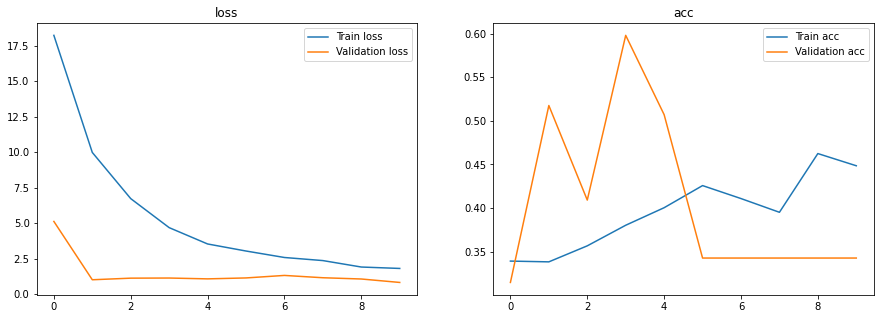

In [ ]:
show_final_history(history)

# Training Data dengan VGG16

Langkah pertama yang harus dilakukan tentunya meng-import VGG16.

In [ ]:
from keras.applications import vgg16

Lalu kita deklarasikan vgg16 kedalam variable.

In [ ]:
vgg16_model = vgg16.VGG16()

553476096/553467096 [==============================] - 5s 0us/step


Setelah itu kita buat model dengan sequential dan memasukan layer-layer di dalam VGG16 ke dalam model sequential tersebut.

In [ ]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
  model.add(layer)

Pada kode diatas kita memasukan layer yang berada di dalam VGG16 ke dalam model sequential yang telah dibuat dengan perulangan.

**layers[:-1]** akan membuat layer terakhir tidak dimasukan karena nantinya akan kita tambahkan secara manual agar sesuai dengan output yang kita inginkan.

Terakhir kita tambahkan layer Dense dengan activation softmax sebagai layer output.

In [ ]:
model.add(Dense(3, activation='softmax'))

## Compiling Model

Setelah VGG16 berhasil kita implementasikan kedalam model, sekarang kita susun model tadi.

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

## Model Training

Kita akan melakukan 5 epochs karena jumlah layer yang banyak akan mempengaruhi lama proses training, untuk efisiensi waktu kita akan menggunakan 5 epochs.

In [ ]:
history = model.fit(
    train_image,
    validation_data=val_image,
    epochs=5
)

Epoch 1/5
36/36 [==============================] - 2263s 63s/step - loss: 6654277.5000 - accuracy: 0.3872 - val_loss: 10.4874 - val_accuracy: 0.3427
Epoch 2/5
36/36 [==============================] - 2234s 62s/step - loss: 8.9190 - accuracy: 0.2893 - val_loss: 2.3874 - val_accuracy: 0.3427
Epoch 3/5
36/36 [==============================] - 2227s 62s/step - loss: 6.7413 - accuracy: 0.3601 - val_loss: 3.7852 - val_accuracy: 0.3147
Epoch 4/5
36/36 [==============================] - 2235s 62s/step - loss: 1.4320 - accuracy: 0.3042 - val_loss: 1.8884 - val_accuracy: 0.3427
Epoch 5/5
36/36 [==============================] - 2238s 62s/step - loss: 1.3074 - accuracy: 0.3453 - val_loss: 1.2423 - val_accuracy: 0.3427


## Analisa

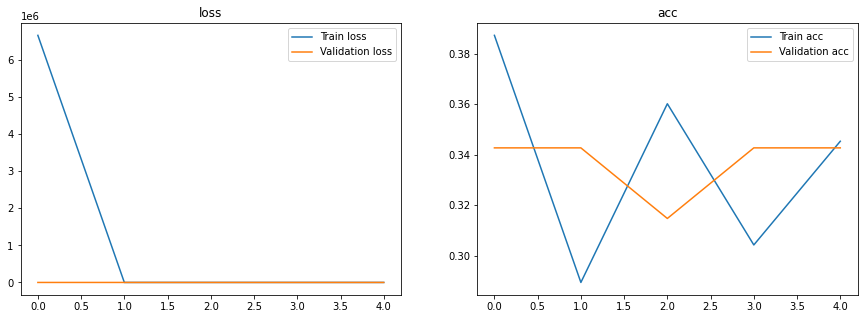

In [ ]:
show_final_history(history)

# Menyimpan Model

Model yang dihasilkan dari data training dapat disimpan untuk digunakan selanjutnya, seperti untuk transfer learning, prediksi, dan sebagainya

In [ ]:
model.save('/content/drive/MyDrive/JST/UAS/model-buah-vgg16.h5')

# Prediksi

Langkah terakhir yang harus dilakukan adalah menguji model

Kode berikut akan memanggil perintah input dari data storage internal perangkat kita untuk memilih gambar. Gambar yang dipilih akan diubah menjadi bentuk array dan di prediksi menggunakan model.predict().

Saving 45_100.jpg to 45_100.jpg
Probabilitas:  [[0.36365712 0.12423659 0.5121063 ]]
Prediksi:  leci


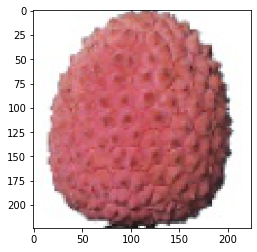

In [ ]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  pr = np.argmax(classes, axis=1)
  
  print("Probabilitas: ", classes)
  print("Prediksi: ", labels[pr[0]])